In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
#I reshaped instead of commenting out (x_train, y_train), (x_test, y_test) = mnist.load_data().
#I did that in order to still have the dataset without needing to use a .csv like I did before on Day 9
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)


<Figure size 640x480 with 9 Axes>

In [2]:
from keras.utils.np_utils import to_categorical
def load_dataset():
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

In [3]:
def prep_pixels(train, test):
    normalize_train = train.astype('float32')
    normalize_test = test.astype('float32')
    normalize_train = normalize_train / 255.0
    normalize_test = normalize_test / 255.0
    return normalize_train, normalize_test

In [4]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model 
    

In [5]:
from sklearn.model_selection import KFold
def evaluate_model(x_data,y_data,n_folds=5):
    scores,histories = list(),list()
    kfold = KFold(n_folds,shuffle=True,random_state=1)
    for ix_train,ix_test in kfold.split(x_data):
        model = define_model()
        x_train,y_train,x_test,y_test = x_data[ix_train],y_data[ix_train],x_data[ix_test],y_data[ix_test]
        history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),verbose=0)
        _,acc = model.evaluate(x_test,y_test,verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

In [6]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        pyplot.subplot(2,1,1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
        pyplot.subplot(2,1,2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
        
    pyplot.show()

In [7]:
def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    pyplot.boxplot(scores)
    pyplot.show()

In [8]:
def run_test_harness():
    x_train,y_train,x_test,y_test = load_dataset()
    x_train,x_test = prep_pixels(x_train,x_test)
    scores,histories = evaluate_model(x_train,y_train)
    summarize_diagnostics(histories)
    summarize_performance(scores)

> 98.608
> 98.600
> 98.542
> 98.792
> 98.792


/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


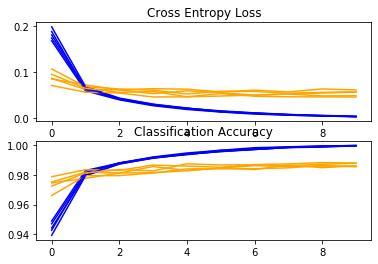

Accuracy: mean=98.667 std=0.105, n=5


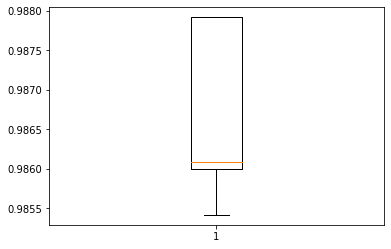

In [9]:
from numpy import mean
from numpy import std
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

def load_dataset():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train,y_train,x_test,y_test
    
run_test_harness()

> 98.533
> 98.758
> 98.808
> 98.817
> 98.850


/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


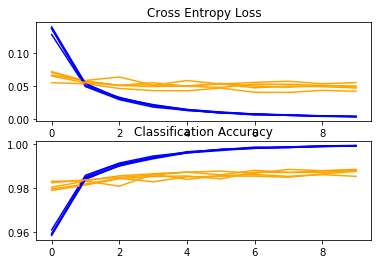

Accuracy: mean=98.753 std=0.114, n=5


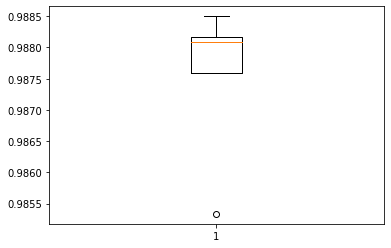

In [10]:
from keras.layers import BatchNormalization

def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model 
    
run_test_harness()

> 98.917
> 98.958
> 98.908
> 98.983
> 98.992


/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


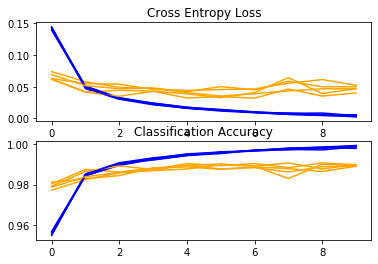

Accuracy: mean=98.952 std=0.034, n=5


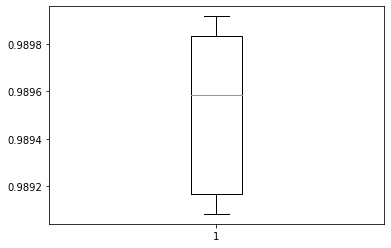

In [11]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model 

run_test_harness()

In [12]:
def run_test_harness():
    x_train,y_train,x_test,y_test = load_dataset()
    x_train,x_test = prep_pixels(x_train,x_test)
    model = define_model()
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
    model.save('final_model.h5')
    
run_test_harness()

In [15]:
from keras import models
from keras.models import load_model
def run_test_harness():
    x_train,y_train,x_test,y_test = load_dataset()
    x_train,x_test = prep_pixels(x_train,x_test)
    model = load_model('final_model.h5')
    _,acc = model.evaluate(x_test,y_test,verbose=0)
    print('> %.3f' % (acc * 100.0))
    
run_test_harness()

> 99.260
